This notebook is an adaptation of [2] and provides a starting point for training fully connected NNs.

It shows how to use a dataset from tensorflow and display images from the training and test sets.

Builds a fully connected network and shows results and after training



### Refs 

[1] https://www.tensorflow.org/install

[2] https://www.tensorflow.org/tutorials/keras/classification
    

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Auxiliary functions to show plots of training history and display images

In [2]:
def show_history(history):
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()


def show_images(rows, cols, data):

    width= 2 * rows
    height= 2 * cols

    f, axes= plt.subplots(rows,cols,figsize=(height,width))
    fig=plt.figure()

    for a in range(rows*cols):
        b = x_train[a]
        subplot_title=("class "+str(y_train[a]))
        axes.ravel()[a].set_title(subplot_title)  
        axes.ravel()[a].imshow(data[a, :, :], cmap=plt.cm.binary)
        axes.ravel()[a].axis('off')
    fig.tight_layout()    
    plt.show() 
    
    
    
def show_image(number):
    plt.figure()
    plt.imshow(x_train[number], cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [3]:
class_names = np.array(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

def plot_predictions(predictions, ground_truth, num_rows= 5, num_cols=3 ):

    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i], ground_truth, x_test)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i], ground_truth)
    plt.tight_layout()
    plt.show()
    
    
def show_misclassified(predictions, ground_truth, num_rows= 5, num_cols=3):
    
    # Plot the first X test images with wrong predictions.
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    i = 0
    k = 0
    while i < num_images:
        predicted_label = np.argmax(predictions[k])
        if predicted_label != y_test[k]:
            plt.subplot(num_rows, 2*num_cols, 2*i+1)
            plot_image(k, predictions[k], ground_truth, x_test)
            plt.subplot(num_rows, 2*num_cols, 2*i+2)
            plot_value_array(k, predictions[k], ground_truth)
            i += 1
        k += 1
    plt.tight_layout()
    plt.show()
    

## Loading Datasets


In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


## Display images

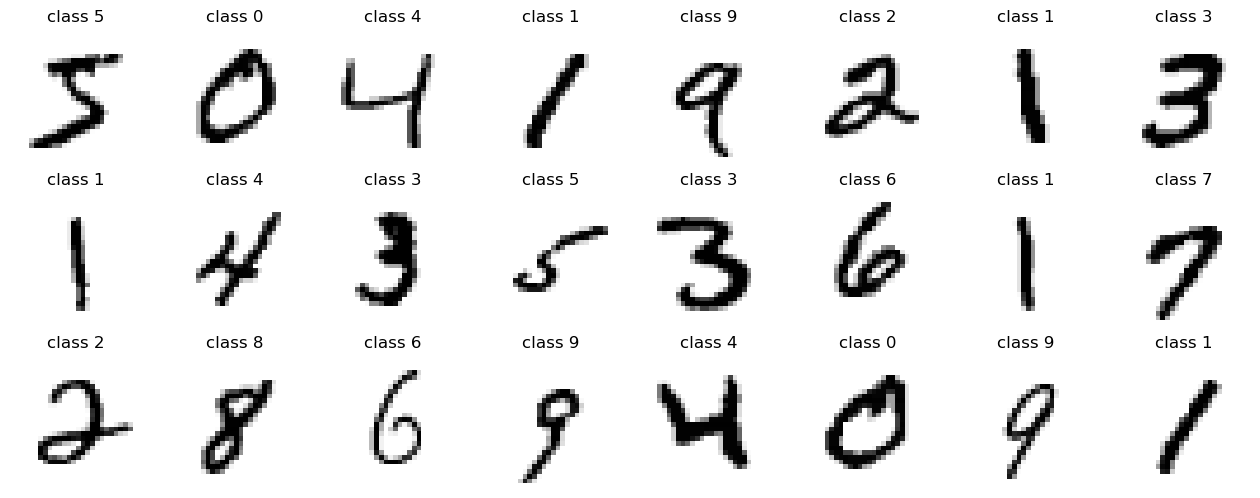

<Figure size 640x480 with 0 Axes>

In [5]:
show_images(3,8,x_train)

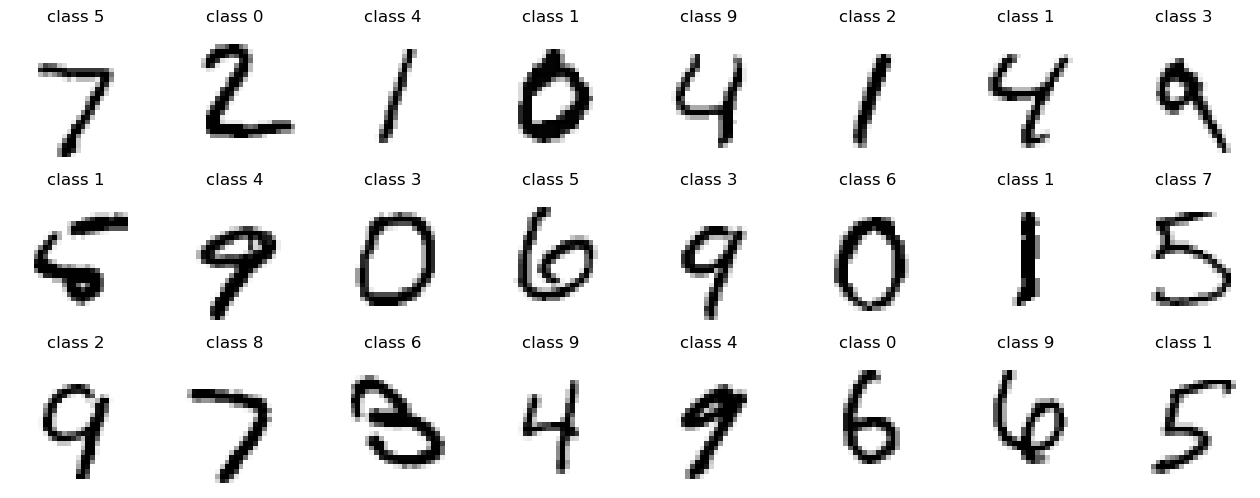

<Figure size 640x480 with 0 Axes>

In [6]:
show_images(3,8,x_test)

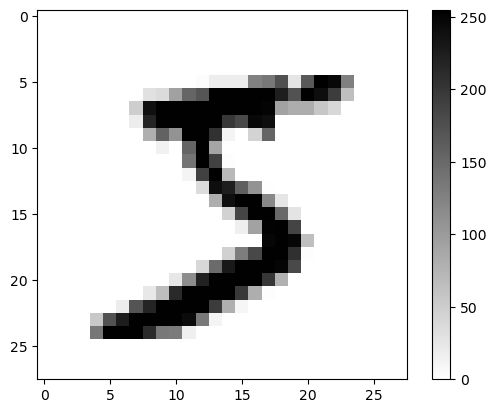

In [7]:
show_image(0)

In [8]:
x_train, x_test = x_train/255.0, x_test/255.0

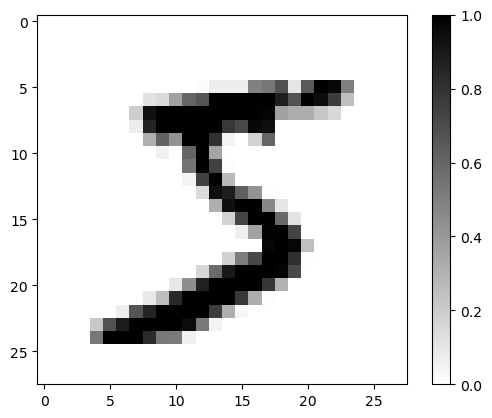

In [9]:
show_image(0)

## Create the model

In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28), name='flatten_image'))
model.add(tf.keras.layers.Dense(64, activation='relu', name='hidden_layer'))
model.add(tf.keras.layers.Dense(10, activation='softmax', name='output'))

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_image (Flatten)      (None, 784)               0         
_________________________________________________________________
hidden_layer (Dense)         (None, 64)                50240     
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None


## Generate predictions

In [12]:
predictions = model.predict(x_test)

In [13]:
print(predictions[0], y_test[0])

[0.07710303 0.10687239 0.04433948 0.05682509 0.17067279 0.07037001
 0.06981445 0.09867485 0.11114327 0.19418463] 7


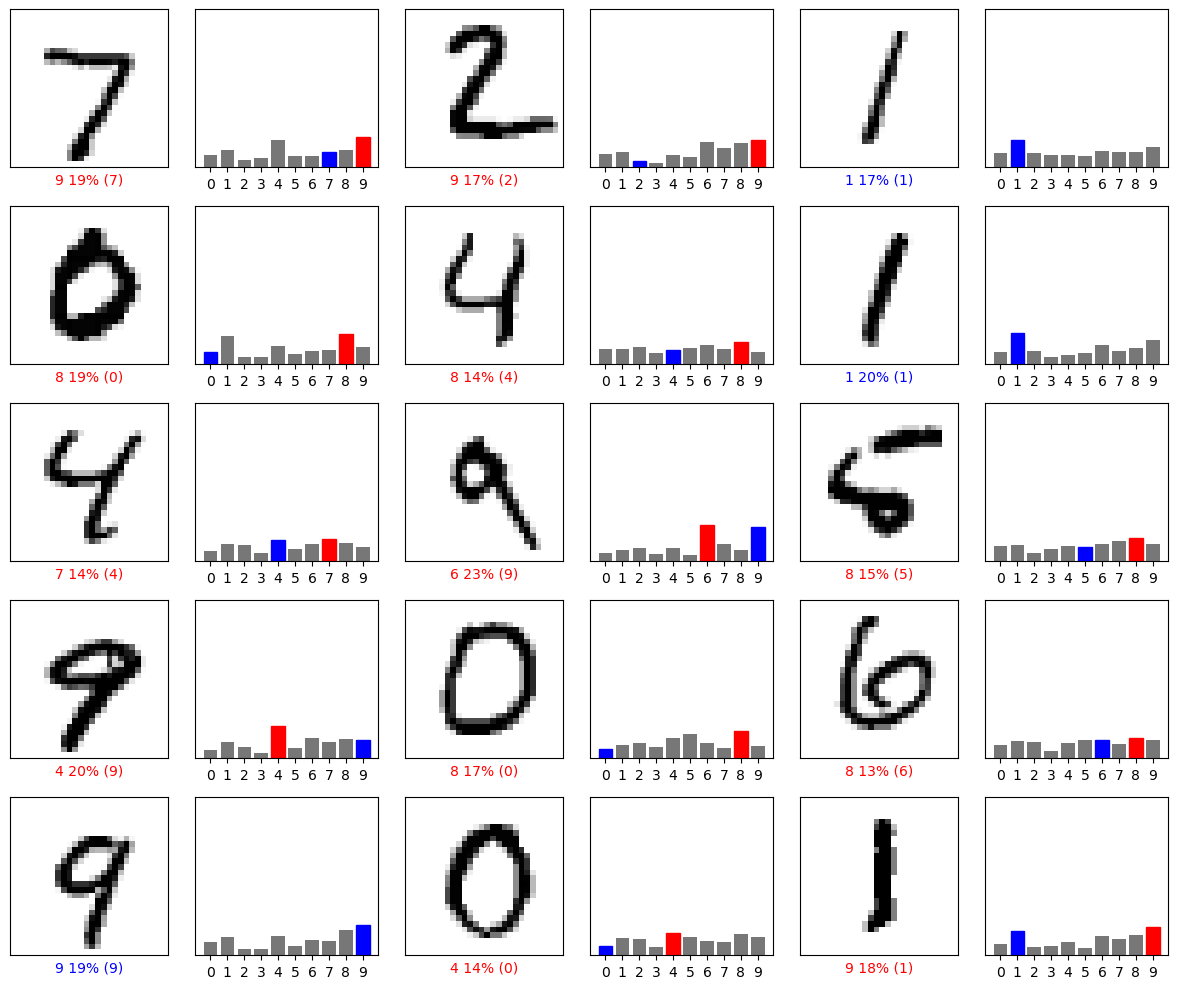

In [14]:
plot_predictions(predictions, y_test, 5,3)

## Training the model

In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

train_dataset = train_dataset.shuffle(buffer_size=60000).batch(32)

In [16]:
@tf.function
def train_step(x,y):
    with tf.GradientTape() as tape:
        output = model(x)
        loss = loss_fn(y, output)
    grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return loss

def train(epochs):
    print('Training Results:')
    for epoch in range(epochs):
        epoch_loss = 0
        for (x_batch, y_batch) in train_dataset:
            epoch_loss += train_step(x_batch, y_batch)
        print(' Epoch: ', epoch, ' | Loss: ', epoch_loss)
    
train(3)

Training Results:
 Epoch:  0  | Loss:  tf.Tensor(571.72046, shape=(), dtype=float32)
 Epoch:  1  | Loss:  tf.Tensor(277.41217, shape=(), dtype=float32)
 Epoch:  2  | Loss:  tf.Tensor(205.82039, shape=(), dtype=float32)


In [17]:
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

eval = model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.1116 - accuracy: 0.9654


In [18]:
predictions = model.predict(x_test)

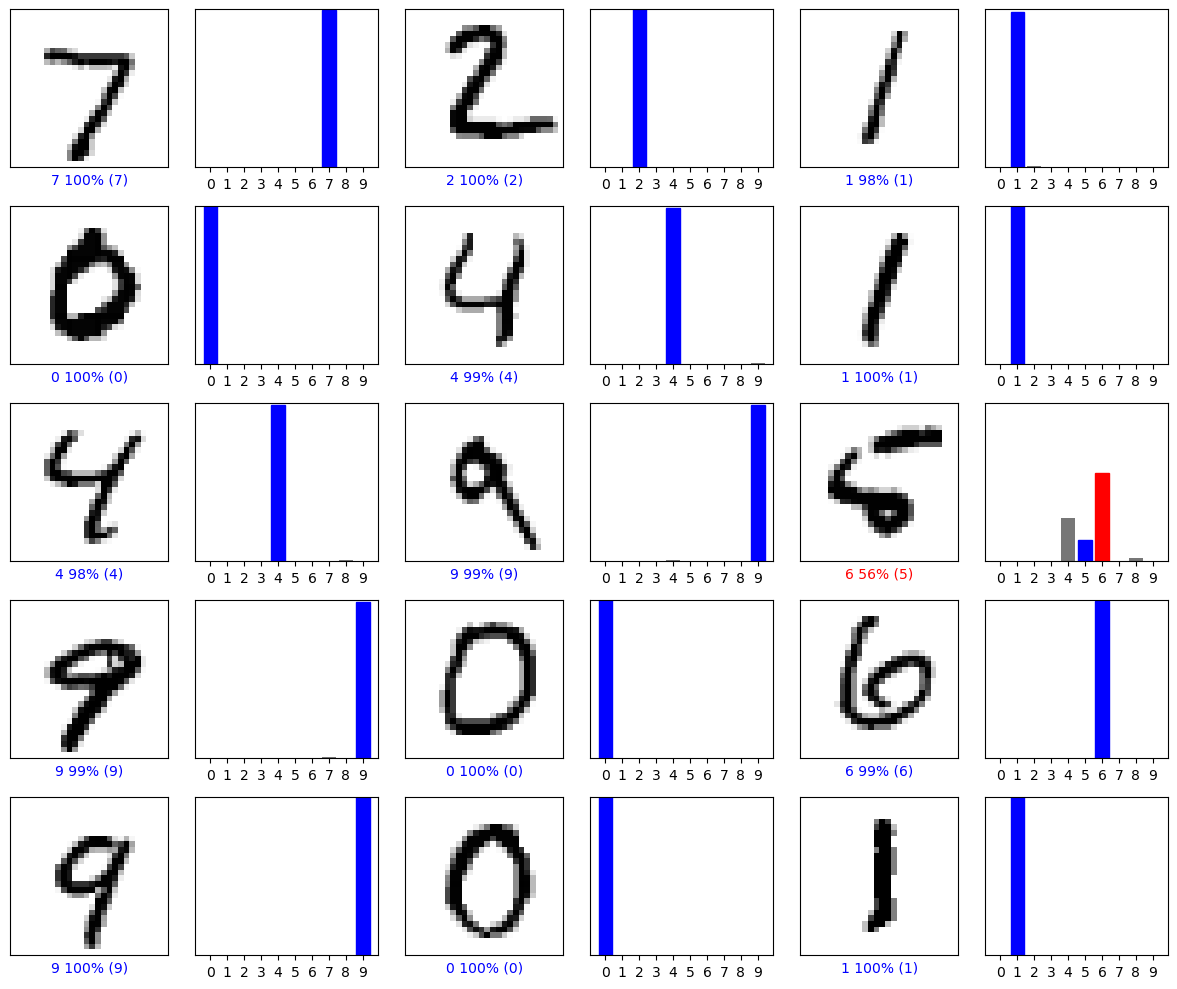

In [19]:
plot_predictions(predictions, y_test, 5, 3)

In [20]:
history = model.fit(x_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 1s 462us/step - loss: 0.0866 - accuracy: 0.9740
Epoch 2/15
1875/1875 [==============================] - 1s 487us/step - loss: 0.0709 - accuracy: 0.9792
Epoch 3/15
1875/1875 [==============================] - 1s 527us/step - loss: 0.0595 - accuracy: 0.9816
Epoch 4/15
1875/1875 [==============================] - 1s 477us/step - loss: 0.0510 - accuracy: 0.9846
Epoch 5/15
1875/1875 [==============================] - 1s 440us/step - loss: 0.0438 - accuracy: 0.9864
Epoch 6/15
1875/1875 [==============================] - 1s 502us/step - loss: 0.0387 - accuracy: 0.9877
Epoch 7/15
1875/1875 [==============================] - 1s 504us/step - loss: 0.0337 - accuracy: 0.9893
Epoch 8/15
1875/1875 [==============================] - 1s 455us/step - loss: 0.0296 - accuracy: 0.9911
Epoch 9/15
1875/1875 [==============================] - 1s 493us/step - loss: 0.0254 - accuracy: 0.9924
Epoch 10/15
1875/1875 [==============================] - 1s 438u

## Checking the results of the training

dict_keys(['loss', 'accuracy'])


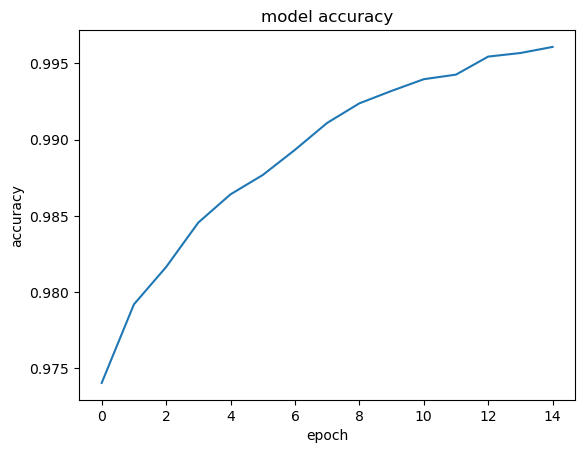

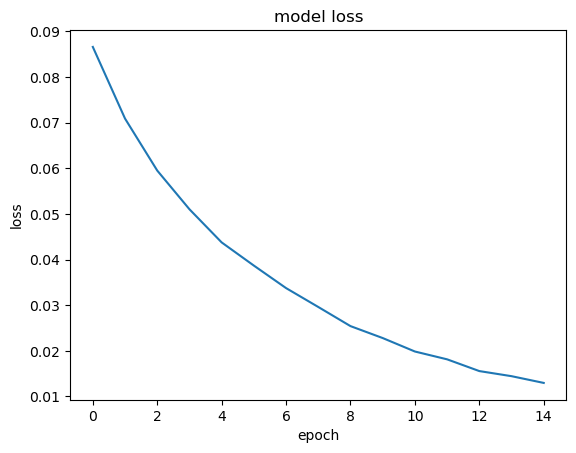

In [21]:
show_history(history)

In [22]:
eval = model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0981 - accuracy: 0.9772


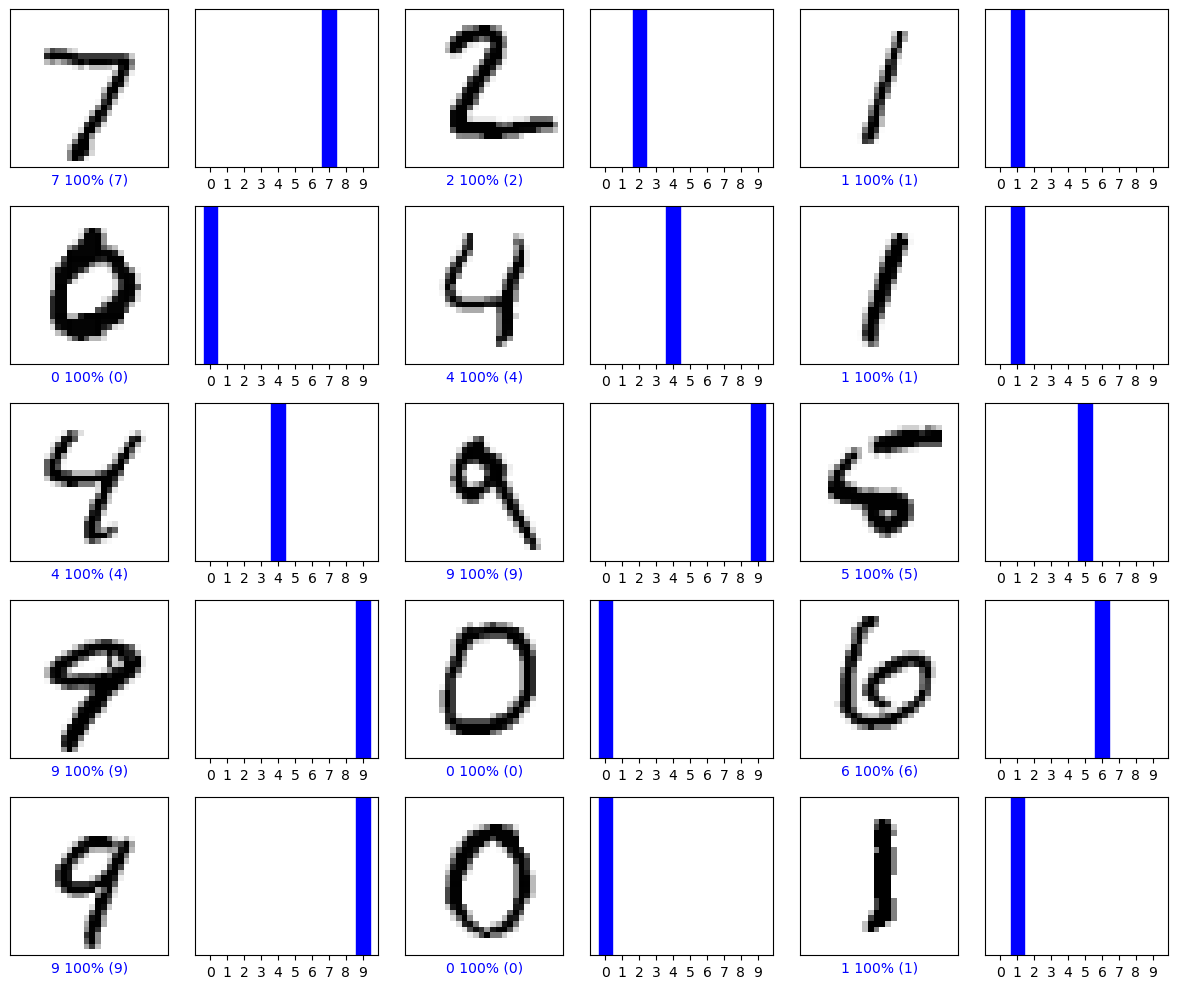

In [23]:
predictions = model.predict(x_test)

plot_predictions(predictions, y_test, 5, 3)

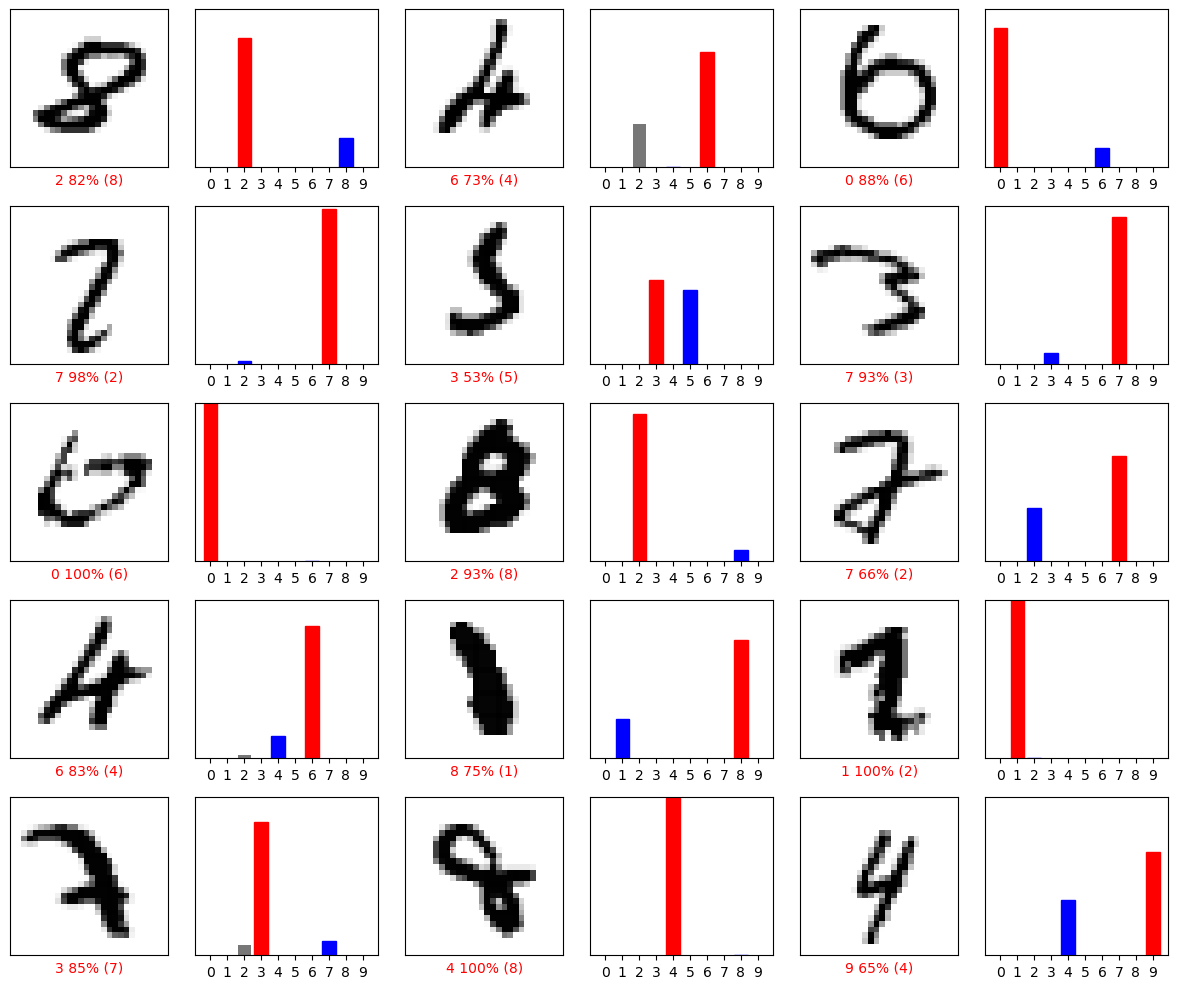

In [24]:
show_misclassified(predictions, y_test, 5, 3)

In [25]:
from collections import Counter

print(Counter(y_train))

Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


In [27]:
predictions[0]

array([2.9361733e-14, 4.5383449e-14, 9.4993418e-08, 1.0556470e-05,
       1.9265922e-14, 2.4026664e-12, 2.2474363e-18, 9.9998868e-01,
       1.5883504e-08, 6.8040367e-07], dtype=float32)

In [33]:
pred = [np.argmax(x) for x in predictions]

pred[0]

7

In [30]:
conf_matrix = tf.math.confusion_matrix(y_test, pred)

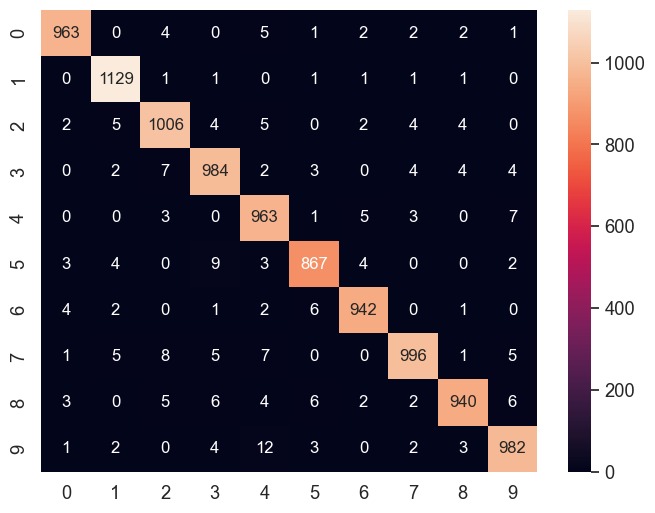

In [32]:
import seaborn as sn 
import pandas as pd 

df_cm = pd.DataFrame(conf_matrix.numpy(), range(10), range(10))

plt.figure(figsize=(8,6))

sn.set(font_scale=1.2)
sn.heatmap(df_cm, annot=True, annot_kws={"size":12}, fmt='d')

plt.show()